# Week 4: Spatial data and introducing spatial analysis
The **objective** of this lecture is to continue to work with spatial data.

In [1]:
import pandas
import geopandas
import matplotlib.pyplot as plt

In [2]:
df = pandas.read_csv("https://raw.githubusercontent.com/danhammer/envirods/main/data/farmers-mkts.csv")
gdf = geopandas.GeoDataFrame(
    df, 
    geometry=geopandas.points_from_xy(df.x, df.y)
)

<AxesSubplot:>

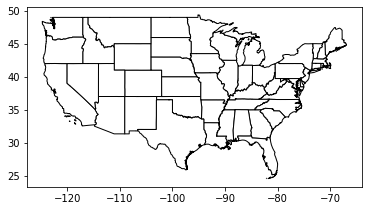

In [3]:
usa = geopandas.read_file("https://raw.githubusercontent.com/danhammer/envirods/main/data/gz_2010_us_040_00_20m.geojson")

conus = usa[
    (usa["NAME"] != "Alaska") & 
    (usa["NAME"] != "Hawaii") &
    (usa["NAME"] != "Puerto Rico")
]
conus.plot(
    color="white",
    edgecolor="black"
)

<AxesSubplot:>

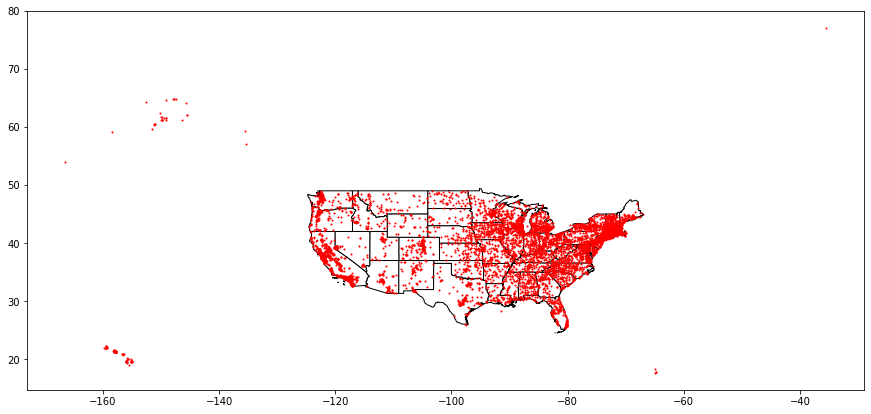

In [4]:
fig, ax = plt.subplots(figsize=(15,10))

conus.plot( 
    ax=ax,
    color="white",
    edgecolor="black"
)

gdf.plot(
    ax=ax, 
    color='red', 
    markersize=1
)

<AxesSubplot:>

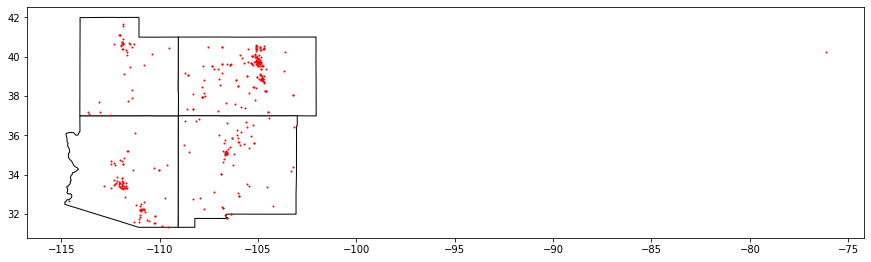

In [5]:
fc_list = ["New Mexico", "Arizona", "Utah", "Colorado"]

fc_geo = conus[conus["NAME"].isin(fc_list)]
fm_fc  = gdf[gdf["State"].isin(fc_list)]

fig, ax = plt.subplots(figsize=(15,10))

fc_geo.plot(
    ax=ax,
    color="white",
    edgecolor="black"
)

fm_fc.plot(
    ax=ax, 
    color='red', 
    markersize=1
)

<AxesSubplot:>

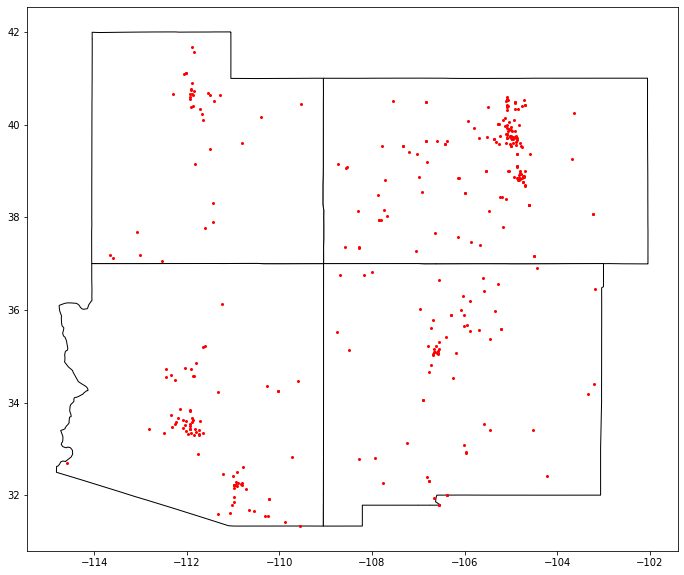

In [6]:
fm_fc = fm_fc[fm_fc["x"] < -100]

fig, ax = plt.subplots(figsize=(15,10))

fc_geo.plot(
    ax=ax,
    color="white",
    edgecolor="black"
)

fm_fc.plot(
    ax=ax, 
    color='red', 
    markersize=4
)

In [7]:
attributes = [
    'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Bakedgoods', 'Cheese', 'Crafts',
    'Flowers', 'Eggs', 'Seafood', 'Herbs', 'Vegetables', 'Honey', 'Jams',
    'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants', 'Poultry', 'Prepared',
    'Soap', 'Trees', 'Wine'
]

X = fm_fc[attributes]
X = (X == "Y").astype(int)
X

,Credit,WIC,WICcash,SFMNP,SNAP,Bakedgoods,Cheese,Crafts,Flowers,Eggs,...,Maple,Meat,Nursery,Nuts,Plants,Poultry,Prepared,Soap,Trees,Wine
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,1,0,0,0,1,1,1,1,1,1,...,0,1,0,0,1,0,1,1,0,0
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7626,0,0,0,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,1
7726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7779,0,0,0,0,1,1,1,1,1,1,...,0,1,1,0,1,1,1,1,1,1
7780,0,0,0,0,1,1,1,1,0,1,...,0,1,0,1,1,1,1,1,0,0


In [8]:
from sklearn.cluster import AgglomerativeClustering

# the distance between points is given by `euclidean` while the clusters 
# are defined by minimizing variance using the Ward method.
cluster = AgglomerativeClustering(
    n_clusters=5, 
    affinity='euclidean', 
    linkage='ward'
)

# assign a new column based on the label and print the values in the new column
label = cluster.fit_predict(X.values)

# what are the different labels?
set(label)

{0, 1, 2, 3, 4}

<AxesSubplot:>

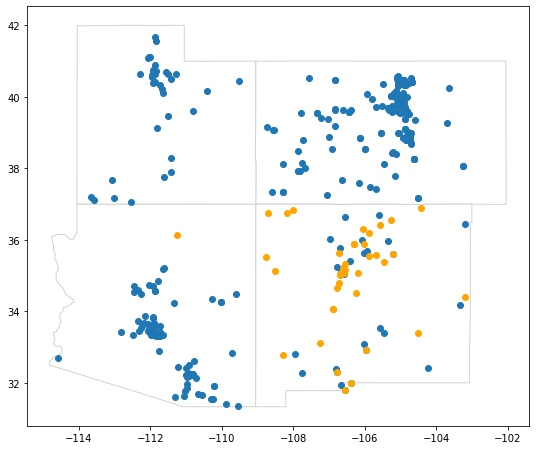

In [9]:
# plot the labels, incrementally, on a map to figure out if there is a geographic
# pattern associated with it.
fig, ax = plt.subplots(figsize=(9,9))

fc_geo.plot(
    ax=ax,
    color='white', 
    edgecolor='lightgrey'
)

# cycle through the labels,
# note that the label "1" seems to reflect farmers' markets in New Mexico
fm_fc[label != 1].plot(
    ax=ax
)

# plot the New Mexico farmers' markets
fm_fc[label == 1].plot(
    ax=ax,
    color="orange"
)

In [10]:
fm_df = pandas.read_csv("https://raw.githubusercontent.com/danhammer/envirods/main/data/farmers-mkts.csv")
fm_gdf = geopandas.GeoDataFrame(
    df, 
    geometry=geopandas.points_from_xy(df.x, df.y)
)


attributes = [
    'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Bakedgoods', 'Cheese', 'Crafts',
    'Flowers', 'Eggs', 'Seafood', 'Herbs', 'Vegetables', 'Honey', 'Jams',
    'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants', 'Poultry', 'Prepared',
    'Soap', 'Trees', 'Wine'
]

# check if there are any null values
sum(fm_df["Credit"].isnull())
sum(fm_df["Credit"] == "Y")
sum(fm_df["Credit"] == "N")

set(fm_df["Credit"].dropna())

{'N', 'Y'}

In [11]:


def report_values(df, varname, proportion=False):
    _var = df[varname].dropna()
    
    if proportion == True:
        print(f"{varname}\n")
        print(f"Total number of observations: {len(_var)}")
        for x in (set(_var)):
            print(f"Proportion of {x} values: {sum(_var == x)/len(_var)}")

    else:
        print(f"{varname}\n")
        print(f"Total number of observations: {len(_var)}")
        for x in (set(_var)):
            print(f"Number of {x} values: {sum(_var == x)}")

            
report_values(df, "Wine", proportion=True)

Wine

Total number of observations: 7864
Proportion of Y values: 0.06917599186164802
Proportion of N values: 0.930824008138352


/Users/danhammer/streamlitenv/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


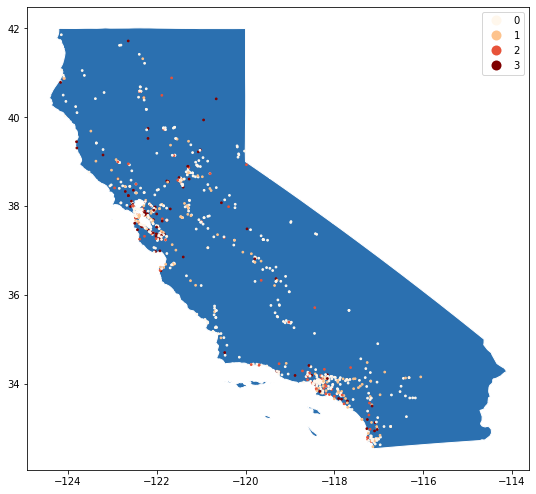

In [12]:
# california
# spatial intersect
usa = geopandas.read_file("https://raw.githubusercontent.com/danhammer/envirods/main/data/gz_2010_us_040_00_20m.geojson")
ca = usa[usa["NAME"] == "California"]

ca_fm = fm_gdf[
    (fm_gdf["State"] == "California") &
    (fm_gdf["x"] < -100)
]

fig, ax = plt.subplots(figsize=(9,9))

ca.plot(
    ax=ax,
    color='#2B70B0', 
    edgecolor='white'
)

ca_fm["protein"] = (ca_fm[["Meat", "Nuts", "Poultry"]] == "Y").sum(axis=1)

ca_fm.plot(
    ax=ax,
    column="protein",
    legend=True,
    markersize=3,
    categorical=True,
    cmap="OrRd"
)

plt.box("off")


In [13]:
import geopandas
usa = geopandas.read_file("https://raw.githubusercontent.com/danhammer/envirods/main/data/gz_2010_us_040_00_20m.geojson")


In [14]:
import pandas
df = pandas.read_csv("~/Downloads/cafo_cleaned.csv"), 
gdf = geopandas.GeoDataFrame(

    geometry=geopandas.points_from_xy(dflon", df.y)
)

SyntaxError: EOL while scanning string literal (<ipython-input-14-480a2a701a7e>, line 5)